# Importing Libraries

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#ML Libraries
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data Loading

In [4]:
df= pd.read_csv("CO2_emission.csv")

In [5]:
df

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


In [6]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [7]:
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


# Exploring features in detail

In [8]:
new_df=df[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)','CO2_Emissions','Smog_Level']]
new_df.head()

,Engine_Size,Cylinders,Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2.4,4,8.6,199,3
1,3.5,6,11.0,256,3
2,2.0,4,9.9,232,6
3,2.0,4,10.3,242,6
4,2.0,4,9.8,230,7


# Visualizing each of the features

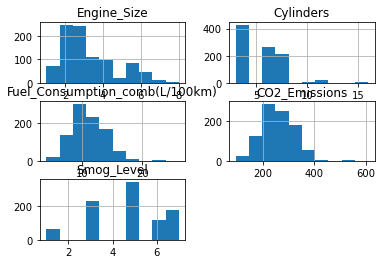

In [21]:
plot=new_df[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)','CO2_Emissions','Smog_Level']]
plot.hist()
plt.show()


# Scatter Plot for Fuel_Consumption_comb(L/100km) and CO2_Emissions

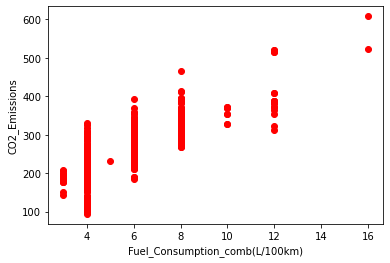

In [20]:
plt.scatter(new_df.Cylinders, new_df.CO2_Emissions, color= "red")
plt.xlabel("Fuel_Consumption_comb(L/100km)")
plt.ylabel("CO2_Emissions")
plt.show()

# Scatter Plot for Engine size and Emissions

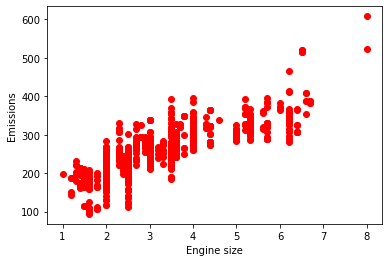

In [78]:
plt.scatter(new_df.Engine_Size, new_df.CO2_Emissions,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()


# Splitting our dataset into train and test sets.(95% , 5%)

In [30]:
split=np.random.rand(len(df)) < 0.95
train = new_df[split]
test = new_df[~split]

# Simple Regression Model

In [59]:
#Modeling
regre = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
regre.fit (train_x, train_y)

LinearRegression()

Text(0, 0.5, 'Emissions')

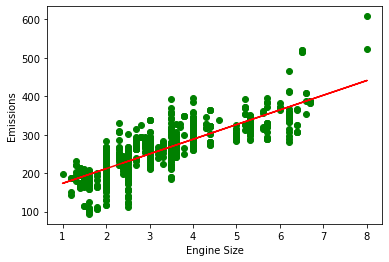

In [54]:
#Plotting the fit line over the data
plt.scatter(train.Engine_Size, train.CO2_Emissions, color = 'green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')


In [58]:
#Evaluation the data
test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of square : %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))
print("Variance: %.2f" % regr.score(train_x, train_y))

Mean absolute error: 23.37
Residual sum of square : 947.97
R2-score: 0.70
Variance: 0.68


# Multiple Regression Model

In [60]:
#Modeling
regre1 = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
y = np.asanyarray(train[['CO2_Emissions']])
regre1.fit (x, y)

LinearRegression()

In [62]:
#Predictions
y_hat = regre1.predict(test[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
x=np.asanyarray(test[['Engine_Size','Cylinders','Fuel_Consumption_comb(L/100km)']])
y = np.asanyarray(test[['CO2_Emissions']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regre1.score(x, y))

Residual sum of squares: 47.00
Variance score: 0.99


Variance score 1 is perfect prediction and i got 0.99 

# K-Means Clustering

In [66]:
#Normalizing over the standard deviation
X = new_df.values[:,1:]
X = np.nan_to_num(x)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.93985043, -0.89625483, -1.16936498],
       [-0.08005035,  0.20976177,  0.16705214],
       [-0.08005035,  0.20976177,  0.37586731],
       [-0.50995039, -0.34324653, -0.45939338],
       [ 0.77974973,  1.31577837,  0.87702373],
       [ 1.12366976,  1.31577837,  1.12760194],
       [-0.93985043, -0.89625483, -0.58468249],
       [-0.93985043, -0.89625483, -0.66820856],
       [-0.93985043, -0.89625483, -0.8352607 ],
       [ 1.89748983,  1.31577837,  1.54523229],
       [ 1.89748983,  1.31577837,  1.9210996 ],
       [ 2.6713099 ,  1.31577837,  1.12760194],
       [ 0.43582969,  0.20976177, -0.33410428],
       [-0.68191041, -0.89625483,  1.04407587],
       [-0.33799038,  0.20976177,  1.16936498],
       [-0.33799038,  0.20976177, -0.1252891 ],
       [ 0.34984969,  0.20976177,  0.25057821],
       [-0.68191041, -0.89625483, -0.04176303],
       [ 1.6395498 ,  1.31577837,  0.91878677],
       [-0.50995039, -0.89625483, -0.20881517],
       [-0.93985043, -0.89625483, -0.793

In [73]:
#Modeling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

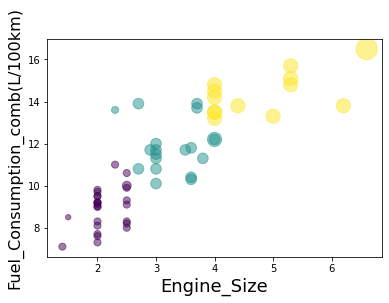

In [74]:
#let's look at the distribution of CO2Emission based on their Engine_Size and Fuel_Consumption_comb(L/100km):
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Engine_Size', fontsize=18)
plt.ylabel('Fuel_Consumption_comb(L/100km)', fontsize=16)

plt.show()

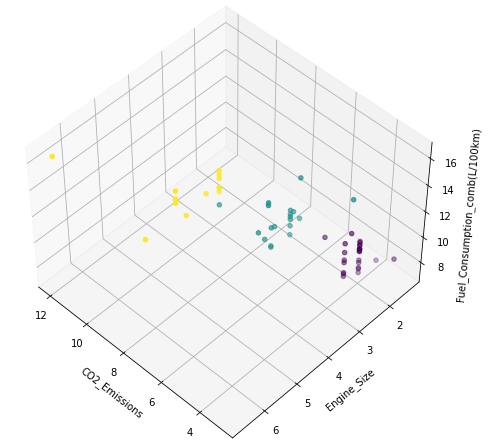

In [76]:
# Exploring in 3 Dimensions
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('CO2_Emissions')
ax.set_ylabel('Engine_Size')
ax.set_zlabel('Fuel_Consumption_comb(L/100km)')

ax.scatter(X[:, 1], X[:, 0], X[:, 2], c= labels.astype(np.float))